<a href="https://colab.research.google.com/github/ksy13001/ML-DL/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
print(train_scaled.shape, train_target.shape)
print(test_input.shape, test_target.shape)
print(val_scaled.shape, val_target.shape)

4422102/4422102 [==============================] - 0s 0us/step
(48000, 28, 28) (48000,)
(10000, 28, 28) (10000,)
(12000, 28, 28) (12000,)


모델 생성 함수

In [4]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))   # Flatten 층 추가 -> 데이터 전처리(2차원 픽셀을 1차원으로 펼치기)
  model.add(keras.layers.Dense(100, activation='relu'))   # 은닉층 추기(활성화 함수:relu) 뉴런 개수 100개
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax')) # 출력층 추가(다중 분류이므로 softmax함수 사용) 뉴런 개수 10개
  return model


In [5]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


verbose = 0 훈련과정 x  
verbose = 1 기본값, 진행과정 표시  
verbose = 2 진행 막대 빼고 표시

In [6]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [7]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


손실 시각화

In [8]:
import matplotlib.pyplot as plt
def plt_loss():
  plt.xlabel('epochs')
  plt.ylabel('loss')
  if history.history['loss']:
    plt.plot(history.history['loss'])
  if 'val_loss' in history.history.keys():
    plt.plot(history.history['val_loss'])
    plt.title('model_loss')
    plt.legend(['train', 'val'])
    plt.show()
  else:
    plt.show()

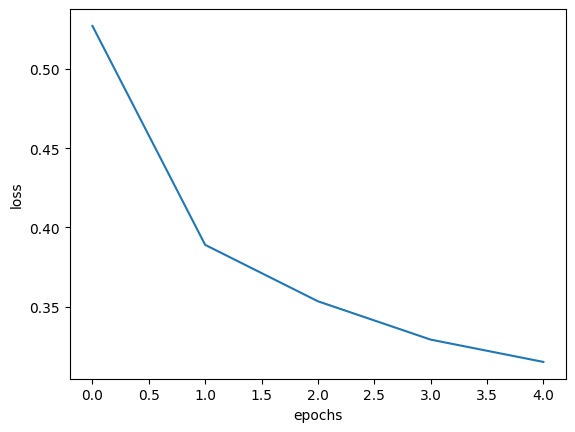

In [9]:
plt_loss()

정확도 시각화

In [10]:
def plt_acy():
  plt.plot(history.history['accuracy'])
  plt.title('model_accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.show()

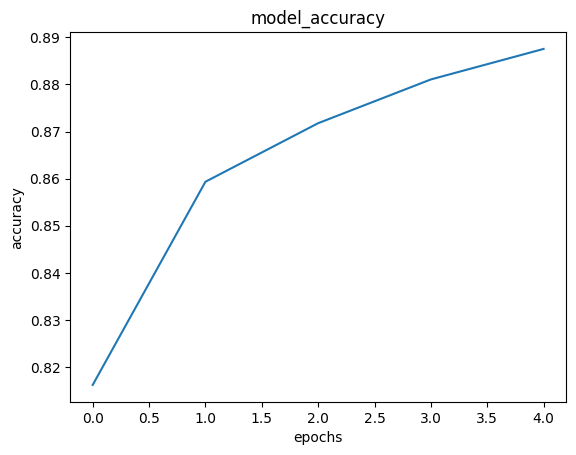

In [11]:
plt_acy()

In [12]:
def plt_model(s):
  plt.plot(history.history[s])
  plt.title('model_'+s)
  plt.xlabel('epochs')
  plt.ylabel(s)
  plt.show()

에포크 수 늘려서 다시 학습

dict_keys(['loss', 'accuracy'])


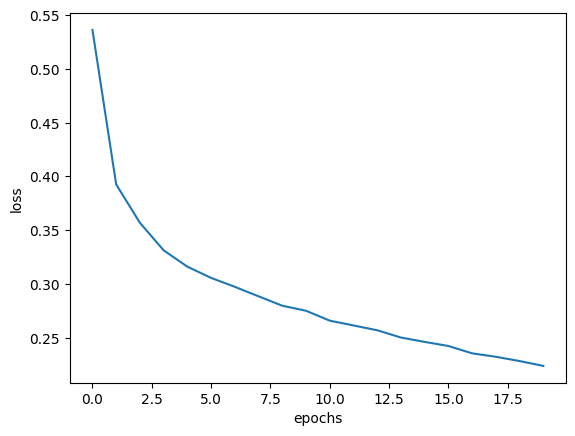

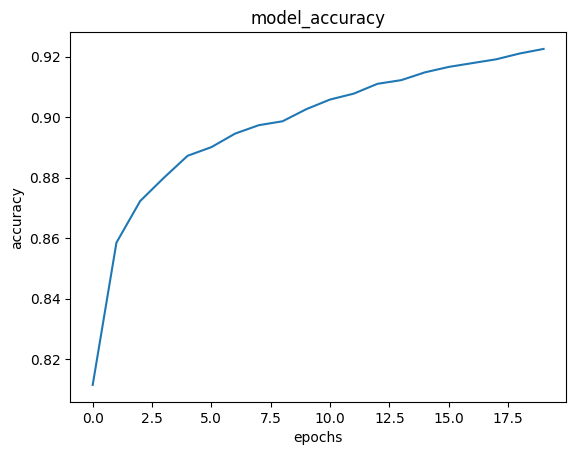

In [13]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
print(history.history.keys())
plt_loss()
plt_acy()

에포크에 따른 과대적합/과소적합을 판단할때, 검증 세트의 점수도 필요함  
--> model.fit( validation_data=(val_scaled, val_target)) 추가

In [14]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data = (val_scaled, val_target))
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


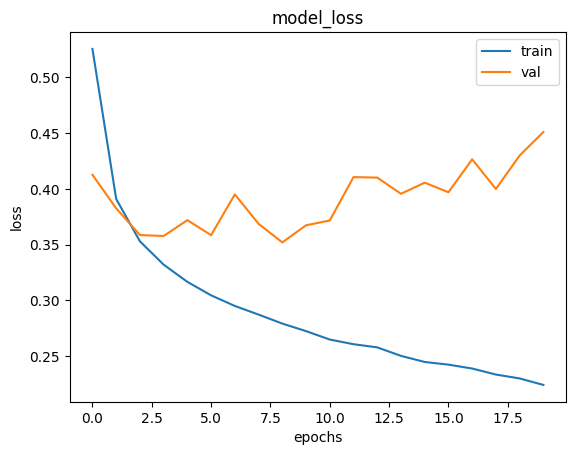

In [15]:
plt_loss()

Adam 옵티마이저 적용

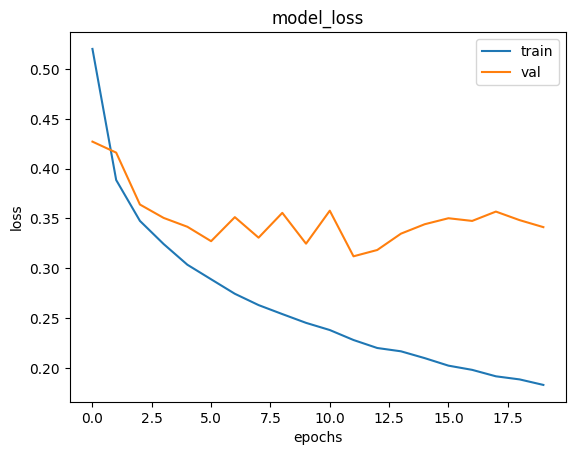

In [16]:
model = model_fn()
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt_loss()

+ 드롭아웃  
: 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 끔(출력을 0으로)  
 --> 특정 류런에 과도한 의존을 줄이고 모든 입력에 대해 주의해야함  
 --> 모델의 과대적합을 막을 수 있음  


드롭 아웃 층 추가(입력과 출력 크기가 같음, 모델 파라미터 0)  
평가와 예측시에는 드롭아웃 적용x(자동으로 적용안됨)

In [17]:
model = model_fn(keras.layers.Dropout(0.3)) # 0.3 -> 30% 드롭아웃
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


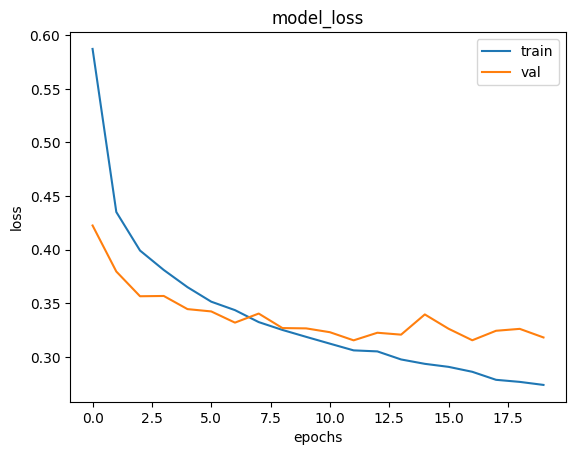

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, verbose=0, epochs=20, validation_data=(val_scaled, val_target))
plt_loss()

epochs = 10 부근 이후로 과대적합이 일어나는것을 알 수 있다

에포크 횟수 10으로 지정 후 모델 훈련

In [19]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

model.save_weights('model-weights.h5')  
--> 훈련된 모델의 파라미터 저장(파일의 확장자가 .h5 일 경우 HDF5 포멧으로 저장)

In [20]:
model.save_weights('model-weights.h5') # 모델 파라미터만 저장

model.save()  
--> 모델 구조와 모델 파라미터를 함께 저장

In [21]:
model.save('model-whole.h5') # 모델 구조 + 파라미터 저장

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:

!ls -al *.h5

-rw-r--r-- 1 root root 333320 Mar 18 11:42 model-weights.h5
-rw-r--r-- 1 root root 981176 Mar 18 11:42 model-whole.h5


model-weights.h5, model-while.h5, 두개의 모델이 저장됐음을 확인할 수 있다.

훈련하지 않은 새 모델에 model-weights.h5에서 훈련된 모델 파라미터 읽어서 사용하기.

In [23]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

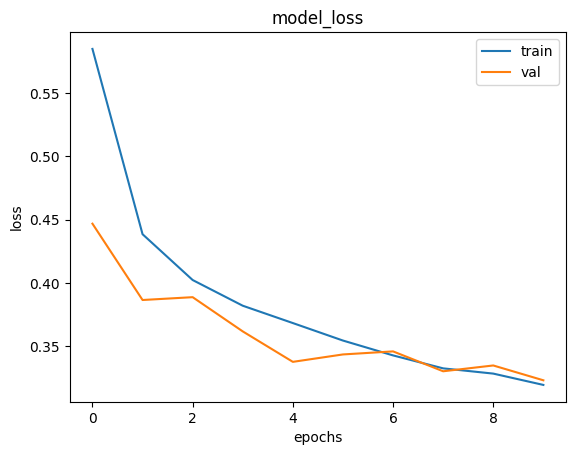

In [24]:
plt_loss()

모델 파라미터 저장 정확도 측정  
compile이 안된 상태이기 때문에 predict 사용

In [25]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1) # argmax: 예측값중 가장 큰 값 인덱스 반환
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 1ms/step
0.88275


모델 전체 저장 파일 정확도 테스트

In [26]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target) # 모델 전체를 저장했기때문에 compile이 필요없음

375/375 [==============================] - 1s 2ms/step - loss: 0.3231 - accuracy: 0.8827


[0.323114275932312, 0.8827499747276306]

결과. 정확도는 둘다 같다.(0.879)

+ 콜백  
: 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체, keras.callbacks 패키지 아래 있는 클래스들  
  - ModelCheckpoint 콜백 : 에포크 마다 모델 저장. save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있음

In [27]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [28]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3147 - accuracy: 0.8888


[0.3146780729293823, 0.8887500166893005]

+ 조기종료
: 검증점수가 상승하기 시작하면 과대적합이 커지기 때문에 훈련을 계속 할필요x  
 --> 과대적합이 시작되기 전에 훈련을 미리 정지(=훈련 에포크 수 제한)  
 --> EarlyStopping 콜백 사용, ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련 정지  
 - patient = 2 # 2번의 에포크 동안 손실이 감소되지 않으면 종료  
 - restore_best_weights = True # 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림


In [29]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
model.fit(train_scaled,train_target, epochs=20, verbose=0, callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
print(early_stopping_cb.stopped_epoch) # 가장 낮은 검증 손실 케이스 에포크 수 확인

시각화

In [ ]:
plt_loss()

In [ ]:
model.evaluate(val_scaled, val_target)